In [1]:
import pandas as pd
import numpy as np

In [2]:
pool = pd.read_csv('20170830_AREDS_DB.csv',index_col=0)

In [3]:
len(pool)

132617

In [4]:
pool.head()

,Patid,Areds_subject_id,converted_file_name,Baseline_AMD_Category,Final_AMD_Phenotype_Group,Final_AMD_Phenotype,Final_Cataract_Phenotype,Study_Visit_Year,Treatment,age_baseline,male,white,Visit,EyeLR,SideLR,SevScore,SimpleSev,age
0,51003,1890,51003-04-F2-LE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2.0,Placebo,72.484932,0,1,4,LE,LS,2.0,1.0,74.484932
1,51003,1890,51003-04-F2-LE-RS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2.0,Placebo,72.484932,0,1,4,LE,RS,2.0,1.0,74.484932
2,51003,1890,51003-04-F2-RE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2.0,Placebo,72.484932,0,1,4,RE,LS,2.0,1.0,74.484932
3,51003,1890,51003-04-F2-RE-RS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2.0,Placebo,72.484932,0,1,4,RE,RS,2.0,1.0,74.484932
4,51003,1890,51003-06-F2-LE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,3.0,Placebo,72.484932,0,1,6,LE,LS,2.0,1.0,75.484932


In [5]:
pool.SevScore.count()

132617

# No matching left and right side? You're out!

In [6]:
weird_indices = []
for _id, df in iter(pool.groupby( ['Patid', 'Visit', 'EyeLR'] )):
    if len(df) != 2:
        weird_indices.extend( list(df.index))

In [7]:
len(weird_indices)

3

In [8]:
pool.drop( weird_indices, inplace=True )

In [9]:
pool = pool[ pool.SideLR == 'LS' ].copy()

In [10]:
pool.drop( 'SideLR', axis=1, inplace=True)

In [11]:
pool.EyeLR.value_counts()

RE    33161
LE    33146
Name: EyeLR, dtype: int64

In [12]:
pool = pool[ pool.SevScore < 10 ].copy()

In [13]:
pool.SevScore = pool.SevScore.astype(int)

In [14]:
pool.SevScore.value_counts()

1    24149
2     7616
4     5830
6     4538
7     3918
5     3672
8     3337
3     3256
9     1135
Name: SevScore, dtype: int64

In [15]:
pool.SimpleSev.value_counts()

0.0    23166
1.0    11539
2.0     8318
4.0     7404
3.0     6748
Name: SimpleSev, dtype: int64

In [16]:
pool.index = pd.MultiIndex.from_arrays( [list(pool.Patid), list(pool.EyeLR), list(pool.Visit)],
                                      names=['Patid', 'EyeLR', 'Visit'])

In [17]:
pool.sort_index(inplace=True)

In [18]:
pool.tail(10)

Patid Areds_subject_id      converted_file_name  \
Patid EyeLR Visit                                                    
62034 LE    6      62034             3081   62034-06-F2-LE-LS.tiff   
            10     62034             3081   62034-10-F2-LE-LS.tiff   
            14     62034             3081   62034-14-F2-LE-LS.tiff   
      RE    6      62034             3081   62034-06-F2-RE-LS.tiff   
            10     62034             3081   62034-10-F2-RE-LS.tiff   
            14     62034             3081   62034-14-F2-RE-LS.tiff   
62035 RE    0      62035             3273  62035-QUA-F2-RE-LS.tiff   
            4      62035             3273   62035-04-F2-RE-LS.tiff   
            6      62035             3273   62035-06-F2-RE-LS.tiff   
            8      62035             3273   62035-08-F2-RE-LS.tiff   

                  Baseline_AMD_Category Final_AMD_Phenotype_Group  \
Patid EyeLR Visit                                                   
62034 LE    6                         1                   Control   
            10                        1                   Control   
            14                        1                   Control   
      RE    6                         1                   Control   
            10                        1                   Control   
            14                        1                   Control   
62035 RE    0                        4a                      Case   
            4                        4a                      Case   
            6                        4a                      Case   
            8                        4a                      Case   

                       Final_AMD_Phenotype Final_Cataract_Phenotype  \
Patid EyeLR Visit                                                     
62034 LE    6       Control Questionable 1           Cortical alone   
            10      Control Questionable 1           Cortical alone   
            14      Control Questionable 1           Cortical alone   
      RE    6       Control Questionable 1           Cortical alone   
            10      Control Questionable 1           Cortical alone   
            14      Control Questionable 1           Cortical alone   
62035 RE    0      GA (Geographic Atrophy)                   Absent   
            4      GA (Geographic Atrophy)                   Absent   
            6      GA (Geographic Atrophy)                   Absent   
            8      GA (Geographic Atrophy)                   Absent   

                   Study_Visit_Year Treatment  age_baseline  male  white  \
Patid EyeLR Visit                                                          
62034 LE    6                   3.0   Placebo     62.764384     0      1   
            10                  5.0   Placebo     62.764384     0      1   
            14                  7.0   Placebo     62.764384     0      1   
      RE    6                   3.0   Placebo     62.764384     0      1   
            10                  5.0   Placebo     62.764384     0      1   
            14                  7.0   Placebo     62.764384     0      1   
62035 RE    0                   0.0    Antiox     61.572603     1      1   
            4                   2.0    Antiox     61.572603     1      1   
            6                   3.0    Antiox     61.572603     1      1   
            8                   4.0    Antiox     61.572603     1      1   

                   Visit EyeLR  SevScore  SimpleSev        age  
Patid EyeLR Visit                                               
62034 LE    6          6    LE         1        0.0  65.764384  
            10        10    LE         1        0.0  67.764384  
            14        14    LE         1        0.0  69.764384  
      RE    6          6    RE         1        0.0  65.764384  
            10        10    RE         1        0.0  67.764384  
            14        14    RE         1        0.0  69.764384  
62035 RE    0          0    RE         7        4.0  61.572603 

In [19]:
from numpy.random import RandomState
def pull_smallest_first( df_in, desired_n=700 ):
    """Maximize number of samples from each severity category,
    matching age distribution across categories as best as possible"""
    # initialize a reproducible shuffler
    rndst = RandomState(seed=42)
    pulled_indices = None # instance of pd.MultiIndex with 3 levels
    pulled_severities = []
    pool_eyes = list( zip( list( df_in.Patid ), list( df_in.EyeLR ) ) )
    orig_counts = dict( zip( list(df_in.SevScore.value_counts().index), list(df_in.SevScore.value_counts()) ))
    print( "Eyes available:", len(set(pool_eyes)), "Target pull:", desired_n*len(orig_counts))
    severity9 = None
    while True:
        if set( pulled_severities ) == set( orig_counts.keys() ):
            # We have pulled for all severity scores
            break
        if pulled_indices is not None:
            pulled_eyes = pulled_indices.to_frame()
            pulled_eyes = set( zip( list( pulled_eyes.Patid ), list( pulled_eyes.EyeLR ) ) )
            unpulled_pool = df_in.loc[ np.array( [ _ not in pulled_eyes for _ in pool_eyes] ) &
                                       np.array( ~df_in.SevScore.isin( pulled_severities ) ) ]
        else:
            unpulled_pool = df_in
        counts = unpulled_pool.SevScore.value_counts()
        # Pull from unused pool in order of smallest to largest amount of images for that
        # severity in the pool
        nimgs_left, severity = sorted( list(zip(counts, counts.index)), key=lambda x: x[0] )[0]
        subset = unpulled_pool[ unpulled_pool.SevScore == severity ]
        if severity == 9:
            # We know severity 9 is the smallest and oldest class
            # Take the earliest diagnosis for each individual to ease age matching
            # They are sorted in Visit order so take the top one.
            subset = subset.groupby( ['Patid', 'EyeLR'] ).head(1)
            severity9 = subset # save for age-matching later
        else:
            # Do age-matching
            wanted_indices = None
            subset_eyes = list( zip( list( subset.Patid ), list( subset.EyeLR ) ) )
            while True:
                if wanted_indices is not None:
                    wanted_eyes = wanted_indices.to_frame()
                    #print (wanted_eyes)
                    wanted_eyes = set( zip( list( wanted_eyes.Patid ), list( wanted_eyes.EyeLR ) ) )
                    unpulled_subset = subset.loc[ np.array( [ _ not in wanted_eyes for _ in subset_eyes ] ) ]
                    if len(unpulled_subset) == 0:
                        break
                else:
                    unpulled_subset = subset
                match_me = float( severity9.age.sample() )
                picked = unpulled_subset.loc[ (unpulled_subset.age - match_me).abs().argmin() ]
                picked_index = pd.MultiIndex.from_tuples( [(picked.Patid, picked.EyeLR, picked.Visit)],
                                                              names=['Patid', 'EyeLR', 'Visit'] )
                if wanted_indices is not None:
                    wanted_indices = wanted_indices.append( picked_index )
                else:
                    wanted_indices = picked_index
                if len(wanted_indices) >= desired_n:
                    break
            subset = subset.loc[ wanted_indices ]

        print( "Severity {}, originally {}, got {}".format(
            severity, orig_counts[severity], len(subset) ) )
        if pulled_indices is None:
            pulled_indices = subset.index
        else:
            pulled_indices = pulled_indices.union( subset.index )
        pulled_severities.append( severity )
        pulled_eyes = pulled_indices.to_frame()
        pulled_eyes = set( zip( list( pulled_eyes.Patid ), list( pulled_eyes.EyeLR ) ) )
    print( "Total n pulled:", len( pulled_indices), len( pulled_eyes ))
    return pulled_indices

In [20]:
wanted_indices = pull_smallest_first( pool, desired_n=600 )

Eyes available: 8256 Target pull: 5400
Severity 9, originally 1135, got 593


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: 'Patid' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: 'EyeLR' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:50: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


Severity 8, originally 3337, got 600
Severity 7, originally 3918, got 600
Severity 6, originally 4538, got 600
Severity 5, originally 3672, got 600
Severity 3, originally 3256, got 600
Severity 4, originally 5830, got 600
Severity 2, originally 7616, got 600
Severity 1, originally 24149, got 600
Total n pulled: 5393 5393


In [21]:
pulled = pool.loc[wanted_indices]

In [22]:
pulled.SevScore.value_counts()

7    600
3    600
6    600
2    600
5    600
1    600
8    600
4    600
9    593
Name: SevScore, dtype: int64

# See what we got

In [23]:
%matplotlib inline
import seaborn as sns

## Original age distributions

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


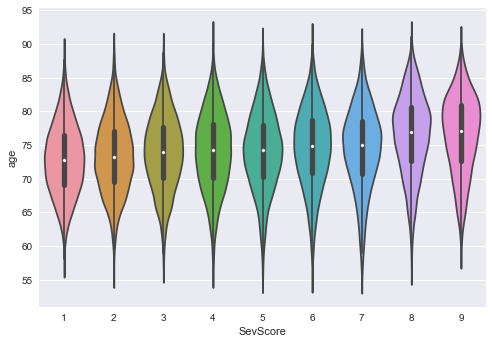

In [36]:
sns.violinplot( x='SevScore', y='age', data=pool)

## This pull's age distributions

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


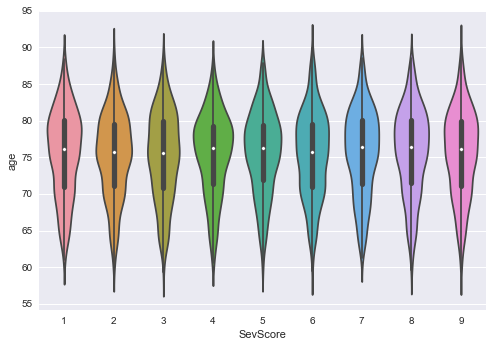

In [24]:
sns.violinplot( x='SevScore', y='age', data=pulled)

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [26]:
mod = ols('age ~ SevScore', data=pulled).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print (aov_table)

              df         sum_sq    mean_sq         F    PR(>F)
SevScore     1.0      58.932538  58.932538  1.762061  0.184424
Residual  5391.0  180303.281223  33.445239       NaN       NaN


/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [28]:
mc = MultiComparison(pulled['age'], pulled['SevScore'])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2     -0.361  -1.3973 0.6754 False 
  1      3    -0.4495  -1.4858 0.5868 False 
  1      4    -0.1589  -1.1952 0.8775 False 
  1      5     0.032   -1.0043 1.0683 False 
  1      6    -0.2329  -1.2692 0.8035 False 
  1      7     0.0435  -0.9928 1.0798 False 
  1      8     0.1796  -0.8568 1.2159 False 
  1      9    -0.0265  -1.0658 1.0129 False 
  2      3    -0.0885  -1.1248 0.9478 False 
  2      4     0.2021  -0.8342 1.2384 False 
  2      5     0.3929  -0.6434 1.4293 False 
  2      6     0.1281  -0.9082 1.1644 False 
  2      7     0.4044  -0.6319 1.4408 False 
  2      8     0.5405  -0.4958 1.5768 False 
  2      9     0.3345  -0.7049 1.3739 False 
  3      4     0.2906  -0.7457 1.3269 False 
  3      5     0.4815  -0.5549 1.5178 False 
  3      6     0.2166  -0.8197 1.2529 False 
  3      7     0.493   -0.5433 1.5293 False 
  3 

In [29]:
import matplotlib.pyplot as plt

(array([ 326.,  414.,  407.,  318.,  341.,  264.,  267.,  323.,  308.,  391.]),
 array([ 51003. ,  52106.2,  53209.4,  54312.6,  55415.8,  56519. ,
         57622.2,  58725.4,  59828.6,  60931.8,  62035. ]),
 <a list of 10 Patch objects>)

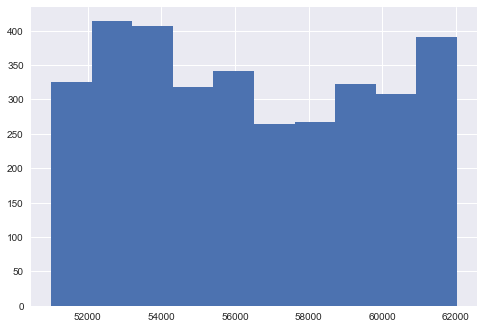

In [30]:
plt.hist( list(set(pulled.Patid)) )

In [31]:
pulled.EyeLR.value_counts()

LE    2773
RE    2620
Name: EyeLR, dtype: int64

In [32]:
pulled.male.value_counts()

0    3103
1    2290
Name: male, dtype: int64

In [33]:
pulled.Visit = pulled.Visit.astype(str).apply( lambda x: x.zfill(2))

In [34]:
strfrmt = '/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_{}_{}/{}-{}-F2-{}-{}.tiff\t{}\n'
infos = pulled[ ['Baseline_AMD_Category', 'Final_AMD_Phenotype_Group', 'Patid', 'Visit', 'EyeLR', 'SevScore'] ]
with open('LR_november2017_severity_agematched.txt', 'w') as f:
    for _, row in infos.sort_values(by=['SevScore', 'Patid']).iterrows():
        cat, phen, patid, visit, eyelr, _dir = row
        if visit == '00':
            visit = 'QUA'
        f.write( strfrmt.format( cat, phen, patid, visit, eyelr, 'LS', _dir ) )
        f.write( strfrmt.format( cat, phen, patid, visit, eyelr, 'RS', _dir ) )

In [35]:
!head LR_november2017_severity_agematched.txt

/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/51011-QUA-F2-LE-LS.tiff	1
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Control/51011-QUA-F2-LE-RS.tiff	1
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Other/51019-20-F2-LE-LS.tiff	1
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Other/51019-20-F2-LE-RS.tiff	1
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_2_Other/51027-22-F2-LE-LS.tiff	1
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_2_Other/51027-22-F2-LE-RS.tiff	1
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_2_Other/51027-20-F2-RE-LS.tiff	1
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_2_Other/51027-20-F2-RE-RS.tiff	1
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Other/51034-06-F2-RE-LS.tiff	1
/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_1_Other/51034-06-F2-RE-RS.tiff	1
